# Primer entrega:

 Exploratory data analysis (EDA)

 La base de datos seleccionada es un registro de la calidad del aire para distintas ciudades de India

 Todos los datos son de tipo float

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [2]:
!ls /content/drive/MyDrive #me fijo que tengo en el drive, n0 estaba pudiendo cargarla

'1505-8003-1-RV_#1505 Review_REVIEWER (1).gdoc'
'1505-8003-1-RV_#1505 Review_REVIEWER.docx'
'1505-8003-1-RV_#1505 Review_REVIEWER.gdoc'
'#1505 Review_Comments Reviewer_.docx'
'#1505 Review_Comments Reviewer_.gdoc'
 17-02-2020EPEC.pdf
'abejas + abundancias Rocio2 (1).xlsx'
'abejas + abundancias Rocio2.xlsx'
'abejas + abundancias.xlsx'
 abejasposta.xlsx
'Abstract en español.gdoc'
 Acta_SegundaReunion_VictoriaMarquez_RAM.docx
 AdimisionDoctorado_translation.gdoc
'Adjectives for describing people all levels.pdf'
 Adscripción
 Aguilar_resubmission.gdoc
 AnalíticoDoctorado_Marquez.gdoc
'apartado 4.7.gdoc'
 Apéndice_Cap4.docx
 bibliochequeada_MS.gdoc
 Bibliography.gdoc
'Biblio perro cabrero .gdoc'
 Bilio_MSfruitset.gdoc
'Bourdieu La ilusión biográfica.pdf'
 Burdieu.pdf
 Capítulo4_1_02_2024.docx
 Cap_Net2016.pdf
'carta al Decano concurso Genética.docx'
'Carta al editor .gdoc'
'Carta del Intencion_V.M.docx'
'CartadeRecomendacion_DAAD_Victoria Marquez.gdoc'
'Carta invitación_VictoriaMar

In [3]:
# cargo las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/city_hour.csv') # cargo la base de datos

In [5]:
df.info() # casi todo son de tipo float menos City, Datetime y AQI_Bucket que son objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [6]:
df.head() # le pido las primeras 5 filas

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
df.sample(20) # le pido una muestra de 20, aca mismo ya puedo ver que hay NAs

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
39861,Ahmedabad,2019-07-19 22:00:00,58.16,140.42,34.16,245.34,158.63,NaN,34.16,95.53,33.53,6.30,80.04,1.48,401.0,Severe
415608,Jaipur,2019-07-05 09:00:00,26.73,54.07,8.45,29.52,31.74,19.64,0.86,8.93,32.46,0.27,2.96,NaN,62.0,Satisfactory
47059,Ahmedabad,2020-05-14 20:00:00,22.52,55.39,3.10,21.19,12.65,NaN,0.55,NaN,53.28,1.50,14.71,0.80,199.0,Moderate
515658,Lucknow,2019-07-25 05:00:00,8.00,NaN,8.80,21.42,18.43,10.43,1.01,3.97,24.96,0.00,0.00,NaN,65.0,Satisfactory
2693,Ahmedabad,2015-04-23 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388966,Hyderabad,2019-07-08 00:00:00,12.94,26.17,1.48,4.58,3.32,5.40,0.32,5.16,14.29,0.11,0.22,0.00,38.0,Good
398382,Jaipur,2017-07-17 15:00:00,5.00,40.00,12.72,21.65,NaN,5.04,0.54,NaN,1.34,0.00,0.00,NaN,84.0,Satisfactory
293863,Ernakulam,2020-02-12 08:00:00,73.09,113.15,71.83,0.79,72.62,62.93,1.93,3.44,NaN,1.64,2.56,0.64,104.0,Moderate
460785,Kolkata,2018-10-19 20:00:00,73.38,137.18,153.34,78.84,232.18,0.53,2.29,3.57,4.36,5.80,9.55,NaN,180.0,Moderate
316779,Gurugram,2018-02-19 18:00:00,NaN,NaN,NaN,NaN,4.15,NaN,0.00,NaN,NaN,NaN,NaN,NaN,345.0,Very Poor


In [7]:
n_filas = df.shape[0] # filas y columnas a ver si cumplía con lo estipulado.
n_columnas = df.shape[1]
print(f"num de filas: {n_filas}")
print(f"num de columnas: {n_columnas}")

num de filas: 707875
num de columnas: 16


In [8]:
round(df.isna().mean() * 100, 2) # Hay valores nulos en casi todas las variables.


City           0.00
Datetime       0.00
PM2.5         20.50
PM10          41.92
NO            16.48
NO2           16.55
NOx           17.41
NH3           38.50
CO            12.22
SO2           18.42
O3            18.25
Benzene       23.12
Toluene       31.16
Xylene        64.39
AQI           18.23
AQI_Bucket    18.23
dtype: float64

Trabajamos un poco con los objetos y las columnas que no tienen nulos

In [9]:
df['City'].nunique() # cuantos valores unicos hay en city. Se tomaron mediciones de 24 cuidades

26

In [10]:
df["City"].unique() # veo los distintos valores que puede tomar "City"

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [11]:
type(df["Datetime"][0])

str

In [12]:
df.Datetime = pd.to_datetime(df.Datetime, format="%Y-%m-%d") # lo convierto a dato tamporal con dias, meses y años

In [13]:
type(df["Datetime"][0]) # ahora un dato temporal

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
fecha_min = df["Datetime"].min() # tiro el min y el max para ver de cuanto es la serie temporal
fecha_min


Timestamp('2015-01-01 01:00:00')

In [ ]:
fecha_max = df["Datetime"].max()  # las mediciones van desde el 2015 al 2020
fecha_max

Timestamp('2020-07-01 00:00:00')

In [ ]:
df['Year'] = ''

In [15]:
df.loc[(df.Datetime.dt.year==2015), 'Year'] = 2015
df.loc[(df.Datetime.dt.year==2016), 'Year'] = 2016
df.loc[(df.Datetime.dt.year==2017), 'Year'] = 2017
df.loc[(df.Datetime.dt.year==2018), 'Year'] = 2018
df.loc[(df.Datetime.dt.year==2019), 'Year'] = 2019
df.loc[(df.Datetime.dt.year==2020), 'Year'] = 2020

In [16]:
df.head(20)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.00,0.0,NaN,NaN,2015.0
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.00,0.0,NaN,NaN,2015.0
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.00,0.0,NaN,NaN,2015.0
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.00,0.0,NaN,NaN,2015.0
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.00,0.0,NaN,NaN,2015.0
5,Ahmedabad,2015-01-01 06:00:00,NaN,NaN,0.33,15.95,10.82,NaN,0.33,29.87,64.25,0.0,0.00,0.0,NaN,NaN,2015.0
6,Ahmedabad,2015-01-01 07:00:00,NaN,NaN,0.45,15.94,12.47,NaN,0.45,27.41,191.96,0.0,0.00,0.0,NaN,NaN,2015.0
7,Ahmedabad,2015-01-01 08:00:00,NaN,NaN,1.03,16.66,16.48,NaN,1.03,20.92,177.21,0.0,0.00,0.0,NaN,NaN,2015.0
8,Ahmedabad,2015-01-01 09:00:00,NaN,NaN,1.47,16.25,18.02,NaN,1.47,16.45,122.08,0.0,0.00,0.0,NaN,NaN,2015.0
9,Ahmedabad,2015-01-01 10:00:00,NaN,NaN,2.05,13.78,16.08,NaN,2.05,15.14,NaN,0.0,0.00,0.0,NaN,NaN,2015.0


Empezamos a trabjar con los nulos a ver como podemos solucionar el tema




In [17]:
df_sinNa = df.copy() # hago una copia por las dudas


In [18]:
# Para la columna de Xyleno que tiene un 65 % de datos faltantes la vamos a eliminar
df_sinNa = df_sinNa.drop("Xylene", axis=1)

In [19]:
# Para la columna de PM10 con un 44 % de datos faltantes tambien se va, además esta columna es muy radundante con la primera
df_sinNa = df_sinNa.drop("PM10", axis=1)

In [20]:
df_agrupado = df.groupby(['City'])

In [21]:
df_agrupado["NO"].mean()  # las medias de las cuidades son muy diferentes entre sí, estaria introduciendo mucho error al remplezar los Na por una media de la columna

City
Ahmedabad             22.236505
Aizawl                 9.379820
Amaravati              4.416163
Amritsar              18.630821
Bengaluru              9.441072
Bhopal                 7.087250
Brajrajnagar          14.142573
Chandigarh            10.548368
Chennai                9.205325
Coimbatore             7.410164
Delhi                 39.005350
Ernakulam             22.756429
Gurugram              17.923547
Guwahati              20.131091
Hyderabad              7.777900
Jaipur                14.690761
Jorapokhar            11.233604
Kochi                 73.747842
Kolkata               26.693920
Lucknow               15.369607
Mumbai                30.023606
Patna                 31.332888
Shillong               0.919569
Talcher               30.864532
Thiruvananthapuram     3.512665
Visakhapatnam         12.848235
Name: NO, dtype: float64

In [22]:
# imputo los Na de NO  (óxido nítrico) con la valores medios por cuidad y año
df_sinNa['NO'] = df.groupby(['City','Year' ],  group_keys=False)['NO'].apply(lambda x: x.fillna(x.mean()))

In [23]:
round(df_sinNa.isna().mean() * 100, 2) # funcionó pero aun sigo teniendo nulos, posiblemente por que en algunas cuidades y años no se medió el NO

City           0.00
Datetime       0.00
PM2.5         20.50
NO             3.75
NO2           16.55
NOx           17.41
NH3           38.50
CO            12.22
SO2           18.42
O3            18.25
Benzene       23.12
Toluene       31.16
AQI           18.23
AQI_Bucket    18.23
Year           0.00
dtype: float64

In [24]:
#a los que quedaron los rellenimputoo con la media por cuidad
df_sinNa['NO'] = df.groupby(['City'],  group_keys=False)['NO'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
round(df_sinNa.isna().mean() * 100, 2) # ahi estamos

City           0.00
Datetime       0.00
PM2.5         20.50
NO             0.00
NO2           16.55
NOx           17.41
NH3           38.50
CO            12.22
SO2           18.42
O3            18.25
Benzene       23.12
Toluene       31.16
AQI           18.23
AQI_Bucket    18.23
Year           0.00
dtype: float64

In [25]:
# imputo los Na de NO con la valores medios por cuidad para todas las columnas (como para agilizar)
df_sinNa['PM2.5'] = df.groupby(['City'],  group_keys=False)['PM2.5'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['NO2'] = df.groupby(['City'],  group_keys=False)['NO2'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['NOx'] = df.groupby(['City'],  group_keys=False)['NOx'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['NH3'] = df.groupby(['City'],  group_keys=False)['NH3'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['CO'] = df.groupby(['City'],  group_keys=False)['CO'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['SO2'] = df.groupby(['City'],  group_keys=False)['SO2'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['O3'] = df.groupby(['City'],  group_keys=False)['O3'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['Benzene'] = df.groupby(['City'],  group_keys=False)['Benzene'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['Toluene'] = df.groupby(['City'],  group_keys=False)['Toluene'].apply(lambda x: x.fillna(x.mean()))
df_sinNa['AQI'] = df.groupby(['City'],  group_keys=False)['AQI'].apply(lambda x: x.fillna(x.mean()))


In [33]:
round(df_sinNa.isna().mean() * 100, 2) # Aun hay Na posiblemnte por que no se tomaron todas las medidas en tidas las cuidades

City           0.00
Datetime       0.00
PM2.5          0.00
NO             0.00
NO2            0.00
NOx            3.96
NH3            6.81
CO             0.00
SO2            0.00
O3             0.54
Benzene        9.24
Toluene        0.00
AQI            0.00
AQI_Bucket    18.23
Year           0.00
dtype: float64

In [38]:
# a los que quedan los imputo por la media por columna
mean_toluene = df_sinNa['Toluene'].mean()
df_sinNa['Toluene'] = df_sinNa['Toluene'].fillna(mean_toluene)

mean_toluene = df_sinNa['Benzene'].mean()
df_sinNa['Benzene'] = df_sinNa['Benzene'].fillna(mean_toluene)

mean_toluene = df_sinNa['NOx'].mean()
df_sinNa['NOx'] = df_sinNa['NOx'].fillna(mean_toluene)

mean_toluene = df_sinNa['NH3'].mean()
df_sinNa['NH3'] = df_sinNa['NH3'].fillna(mean_toluene)

mean_toluene = df_sinNa['O3'].mean()
df_sinNa['O3'] = df_sinNa['O3'].fillna(mean_toluene)

In [39]:
round(df_sinNa.isna().mean() * 100, 2) # no hay mas Na

City           0.00
Datetime       0.00
PM2.5          0.00
NO             0.00
NO2            0.00
NOx            0.00
NH3            0.00
CO             0.00
SO2            0.00
O3             0.00
Benzene        0.00
Toluene        0.00
AQI            0.00
AQI_Bucket    18.23
Year           0.00
dtype: float64

In [40]:
df["AQI_Bucket"].unique()

array([nan, 'Poor', 'Moderate', 'Very Poor', 'Severe', 'Satisfactory',
       'Good'], dtype=object)

In [41]:
# puedo hacer un groupby AQI_Bucket y ver cuales cual es el rango de los valores AQI para cada categoría
group_by_AQI = df.groupby('AQI_Bucket')

In [42]:
group_by_AQI.min() # good: min 8.0, moderate min 101, poor min 201, satisfactory min 51, severe min 401, very poor min 301

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
AQI_Bucket,,,,,,,,,,,,,,,,
Good,Ahmedabad,2015-04-06 09:00:00,0.01,0.01,0.01,0.01,0.0,0.01,0.0,0.02,0.01,0.0,0.0,0.0,8.0,2015.0
Moderate,Ahmedabad,2015-01-03 04:00:00,0.01,0.01,0.01,0.01,0.0,0.01,0.0,0.01,0.01,0.0,0.0,0.0,101.0,2015.0
Poor,Ahmedabad,2015-01-03 02:00:00,0.03,0.30,0.01,0.01,0.0,0.01,0.0,0.01,0.01,0.0,0.0,0.0,201.0,2015.0
Satisfactory,Ahmedabad,2015-01-03 11:00:00,0.01,0.01,0.01,0.01,0.0,0.01,0.0,0.01,0.01,0.0,0.0,0.0,51.0,2015.0
Severe,Ahmedabad,2015-01-01 16:00:00,0.07,1.11,0.02,0.01,0.0,0.07,0.0,0.01,0.02,0.0,0.0,0.0,401.0,2015.0
Very Poor,Ahmedabad,2015-01-02 17:00:00,0.13,2.39,0.01,0.01,0.0,0.03,0.0,0.01,0.01,0.0,0.0,0.0,301.0,2015.0


In [43]:
group_by_AQI.max()  #good: (8.0-50), moderate (101-200), poor (201-300), satisfactory (51-100), severe (401-3133), very poor (301-400)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
AQI_Bucket,,,,,,,,,,,,,,,,
Good,Visakhapatnam,2020-07-01 00:00:00,836.69,844.03,250.88,270.60,247.40,301.04,47.93,199.65,148.58,491.51,499.40,274.80,50.0,2020.0
Moderate,Visakhapatnam,2020-07-01 00:00:00,999.99,1000.00,494.43,499.51,469.96,499.56,46.23,199.85,309.83,483.85,447.39,499.99,200.0,2020.0
Poor,Visakhapatnam,2020-06-29 19:00:00,999.99,1000.00,493.31,495.56,493.13,499.97,49.96,199.96,361.33,445.05,472.87,433.94,300.0,2020.0
Satisfactory,Visakhapatnam,2020-07-01 00:00:00,999.99,1000.00,408.45,478.23,411.27,497.95,43.52,199.93,175.39,498.07,498.07,250.04,100.0,2020.0
Severe,Visakhapatnam,2020-06-04 00:00:00,999.99,1000.00,498.57,494.15,498.61,194.01,498.57,199.96,497.62,381.58,488.53,461.39,3133.0,2020.0
Very Poor,Visakhapatnam,2020-06-04 03:00:00,999.99,1000.00,498.97,477.37,496.00,476.47,48.88,199.27,424.42,420.12,442.23,278.69,400.0,2020.0


In [44]:
condition_1 = df_sinNa.AQI <= 50 # good
condition_2 = (df_sinNa.AQI > 50) & (df_sinNa.AQI <= 100) # satisfactory
condition_3 = (df_sinNa.AQI > 101) & (df_sinNa.AQI <= 200) # moderate
condition_4 = (df_sinNa.AQI > 201) & (df_sinNa.AQI <= 300) # poor
condition_5 = (df_sinNa.AQI > 301) & (df_sinNa.AQI <= 400) # very poor
condition_6 = df_sinNa.AQI > 400 # severe


In [45]:
df_sinNa.loc[condition_1,'AQI_Bucket'] = df_sinNa.loc[condition_1, 'AQI_Bucket'].fillna('Good')
df_sinNa.loc[condition_2,'AQI_Bucket'] = df_sinNa.loc[condition_2, 'AQI_Bucket'].fillna('Satisfactory')
df_sinNa.loc[condition_3,'AQI_Bucket'] = df_sinNa.loc[condition_3, 'AQI_Bucket'].fillna('Moderate')
df_sinNa.loc[condition_4,'AQI_Bucket'] = df_sinNa.loc[condition_4, 'AQI_Bucket'].fillna('Poor')
df_sinNa.loc[condition_5,'AQI_Bucket'] = df_sinNa.loc[condition_5, 'AQI_Bucket'].fillna('Very poor')
df_sinNa.loc[condition_6,'AQI_Bucket'] = df_sinNa.loc[condition_6, 'AQI_Bucket'].fillna('Severe')

In [46]:
round(df_sinNa.isna().mean() * 100, 2)

City          0.0
Datetime      0.0
PM2.5         0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
AQI           0.0
AQI_Bucket    0.0
Year          0.0
dtype: float64

In [47]:
df_sinNa.sample(20)

,City,Datetime,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
79972,Amritsar,2017-11-17 16:00:00,56.940000,25.000000,38.590000,63.590000,15.170000,0.910000,2.020000,31.010000,3.600000,6.900000,277.000000,Poor,2017.0
171419,Brajrajnagar,2019-06-19 04:00:00,39.450000,0.740000,20.900000,9.870000,32.930000,2.060000,5.090000,5.000000,23.230000,8.139344,102.000000,Moderate,2019.0
322220,Gurugram,2018-10-04 11:00:00,121.730000,50.240000,17.720000,33.480000,26.679585,1.110000,5.900000,54.770000,2.580000,5.394773,250.000000,Poor,2018.0
479352,Lucknow,2015-06-03 11:00:00,57.350000,2.590000,7.260000,6.240000,29.563990,2.390000,5.430000,44.000000,1.430000,1.640000,205.000000,Poor,2015.0
317463,Gurugram,2018-03-20 06:00:00,113.460000,55.490000,14.430000,42.860000,26.679585,0.000000,9.518058,7.780000,1.753423,5.394773,148.000000,Moderate,2018.0
321152,Gurugram,2018-08-20 23:00:00,67.350000,8.530000,29.680000,20.250000,26.679585,0.210000,6.210000,7.880000,1.000000,5.394773,202.000000,Poor,2018.0
591336,Patna,2017-08-13 01:00:00,121.156521,31.332888,37.939637,44.569077,18.366670,1.552188,23.472227,38.807114,1.761845,11.254970,237.929606,Poor,2017.0
214548,Chennai,2018-01-21 14:00:00,65.990000,20.020000,25.570000,24.010000,87.060000,0.580000,65.830000,108.940000,3.160000,3.900000,198.000000,Moderate,2018.0
105236,Bengaluru,2015-04-07 08:00:00,52.730000,2.580000,6.800000,18.880000,1.540000,1.375805,3.030000,34.670000,2.345345,4.147976,62.000000,Satisfactory,2015.0
166562,Brajrajnagar,2018-11-28 19:00:00,66.448648,14.142573,16.821701,23.224338,35.687221,1.824064,10.036474,16.101145,4.677130,8.139344,151.419829,Moderate,2018.0


Ahora vamos a analizar como se distribuyen algunas de las variables numéricas.

In [48]:
#NO
df_sinNa.NO.describe()

count    707875.000000
mean         18.065442
std          29.605729
min           0.010000
25%           4.416163
50%           9.430000
75%          21.400000
max         499.990000
Name: NO, dtype: float64

<ipython-input-49-7886a77d6a4c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x=df_sinNa.NO)


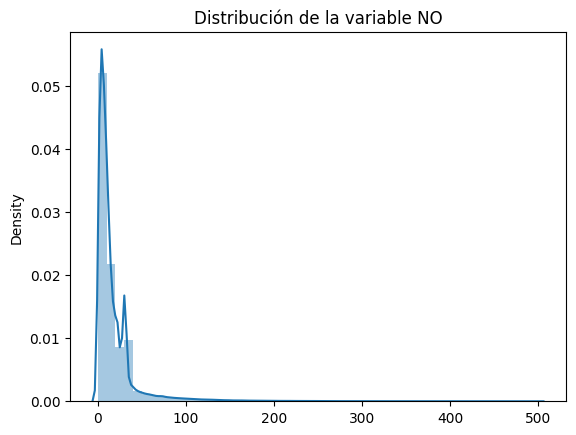

In [49]:
#distribución de la variable
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x=df_sinNa.NO)
ax.set_title("Distribución de la variable NO")
plt.show()
# se ve un poco extraño, vamos a corroborar los outliers

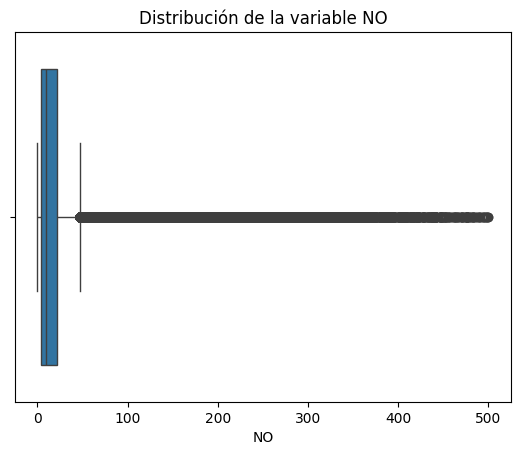

In [50]:
# boxplot (es bueno para visualizar datos atípicos)
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_sinNa.NO)
ax.set_title("Distribución de la variable NO")
plt.show() # hay varios valores atípicos. Posiblemente algunos tomados los mismos dias

In [51]:
# hago una función para filtrar y eliminar los outliers utilizando IQR
def eliminar_outliers(df, variable):
 Q1= df[variable].quantile(0.25)
 Q3= df[variable].quantile(0.75)
 IQR= Q3-Q1

 lower_limit = Q1 - 1.5 * IQR
 upper_limit = Q3 + 1.5  *IQR
 return df[(df[variable]>=lower_limit) & (df[variable]<=upper_limit)]

In [56]:
df_sinout= eliminar_outliers(df_sinNa,"NO")


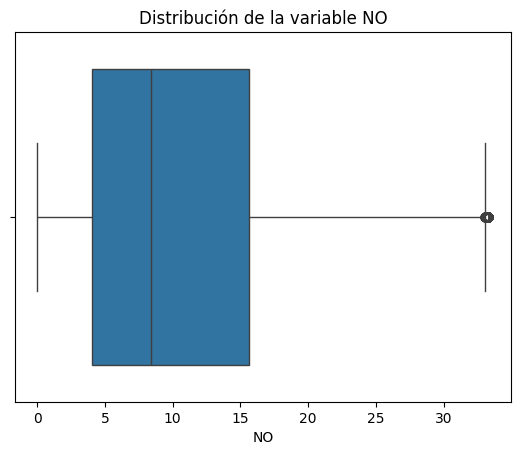

In [64]:
# vuelvo a correr el boxplot para ver si mejoró
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_sinout.NO)
ax.set_title("Distribución de la variable NO")
plt.show() # sigo teniendo datos atípicos, lo corro sucesivamente hasta eliminarlos completamente

In [63]:
df_sinout= eliminar_outliers(df_sinout,"NO") # lo corro varias veces hasta que logro eliminar todos los outliers

<ipython-input-65-fcbf6022809a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x=df_sinout.NO)


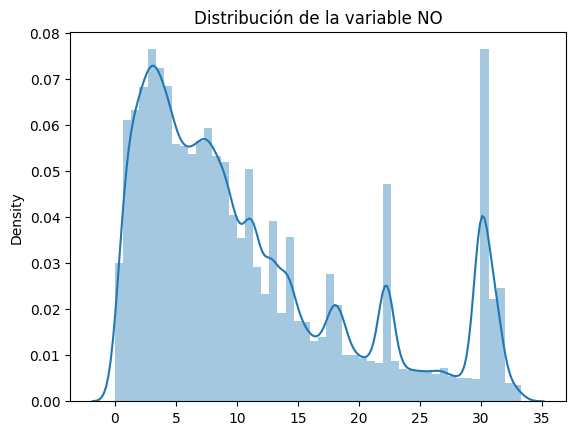

In [65]:
# una vez que eliminé los datos atípicos vuelvo a graficar la distribución de la variables
#distribución de la variables
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x=df_sinout.NO)
ax.set_title("Distribución de la variable NO")
plt.show()


In [67]:
# SO2
df_sinNa.SO2.describe()

count    707875.000000
mean         15.373257
std          18.787627
min           0.010000
25%           5.540000
50%           9.530000
75%          15.940000
max         199.960000
Name: SO2, dtype: float64

<ipython-input-68-3bbc08bcd2aa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x=df_sinNa.SO2)


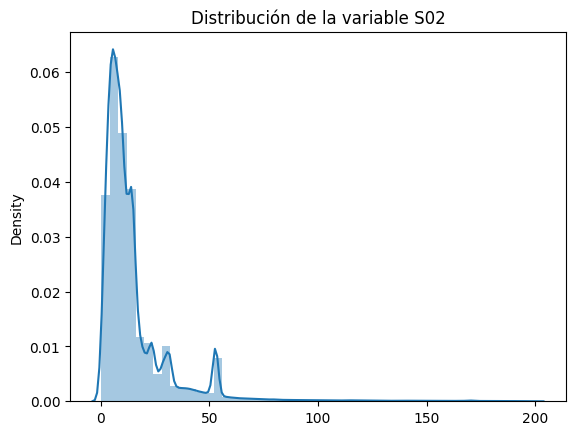

In [68]:
#distribución de la variable
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x=df_sinNa.SO2)
ax.set_title("Distribución de la variable S02")
plt.show()
# se ve un poco extraño, vamos a corroborar los outliers

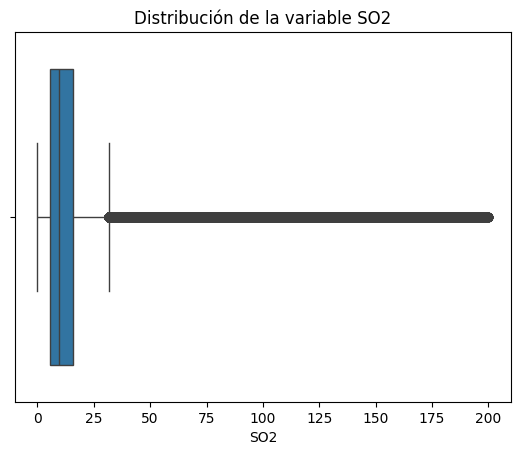

In [69]:
# boxplot (es bueno para visualizar datos atípicos)
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_sinNa.SO2)
ax.set_title("Distribución de la variable SO2")
plt.show() # hay outliers

In [70]:
df_sinout= eliminar_outliers(df_sinNa,"SO2")

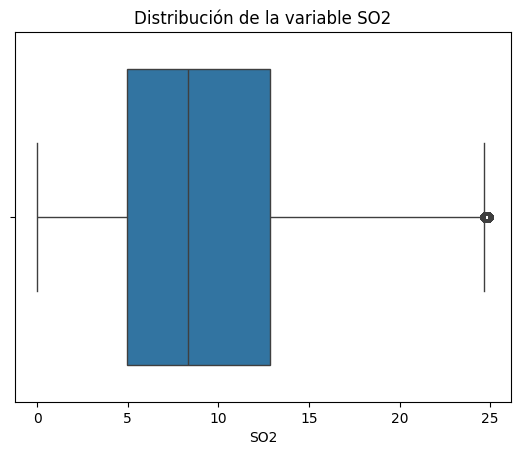

In [75]:
# vuelvo a correr el boxplot
ax = plt.axes()
ax = sns.boxplot(x=df_sinout.SO2)
ax.set_title("Distribución de la variable SO2")
plt.show()

In [74]:
df_sinout= eliminar_outliers(df_sinout,"SO2") # lo corro hasta que no quedan mas outliers

<ipython-input-76-c8d61ce0a81e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x=df_sinout.SO2)


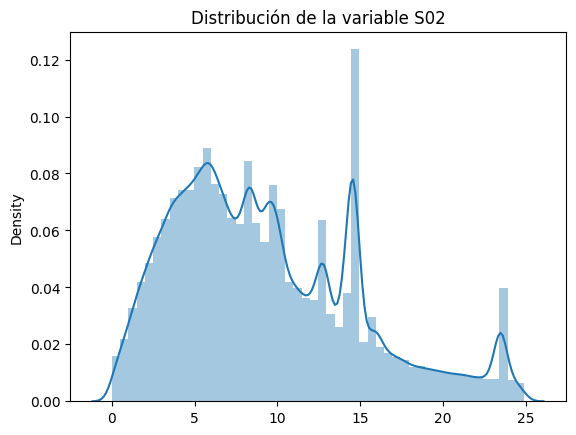

In [76]:
#ploteo otra vez la distribución de la variable
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x=df_sinout.SO2)
ax.set_title("Distribución de la variable S02")
plt.show()
# se ve un poco extraño, vamos a corroborar los outliers

Distribución variables categóricas


In [77]:
df_sinout["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

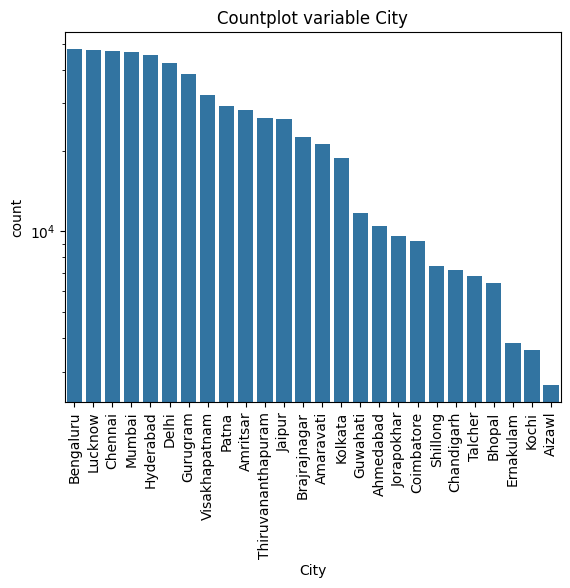

In [78]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='City', data=df_sinout, order=df_sinout.City.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Countplot variable City")
plt.show()
#parece haber un desbalance de clases

In [ ]:
df_sinout["AQI_Bucket"].unique()

array(['Severe', 'Poor', 'Moderate', 'Very Poor', 'Satisfactory', 'Good'],
      dtype=object)

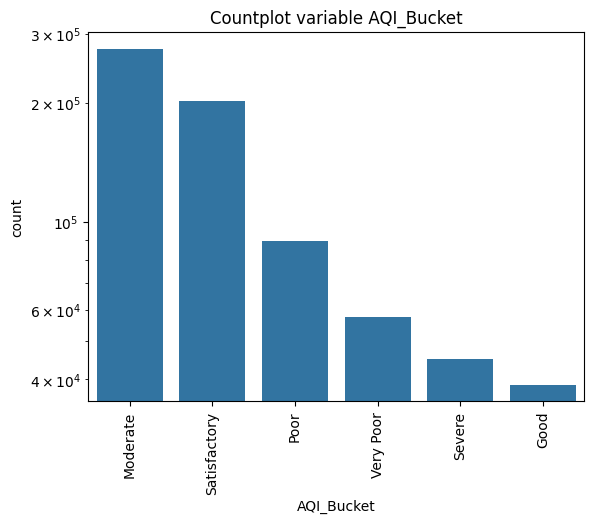

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='AQI_Bucket', data=df_sinout, order=df_sinout.AQI_Bucket.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Countplot variable AQI_Bucket")
plt.show()

In [ ]:
df_sinout["Year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=object)

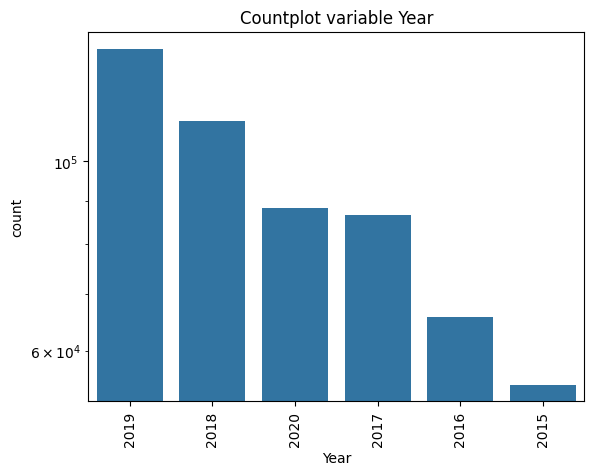

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='Year', data=df_sinout, order=df_sinout.Year.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Countplot variable Year")
plt.show() # aca tamb hay desbalance a medida que vamos para atras en el tiempo hay manos datos, eso puede
# afectar el modelo

Exploramos la relación entre las variables

<ipython-input-161-a145e614c949>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_sinout.corr(), dtype=bool))
<ipython-input-161-a145e614c949>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sinout.corr(), mask=mask, cmap=cmap, center=0,


<Axes: >

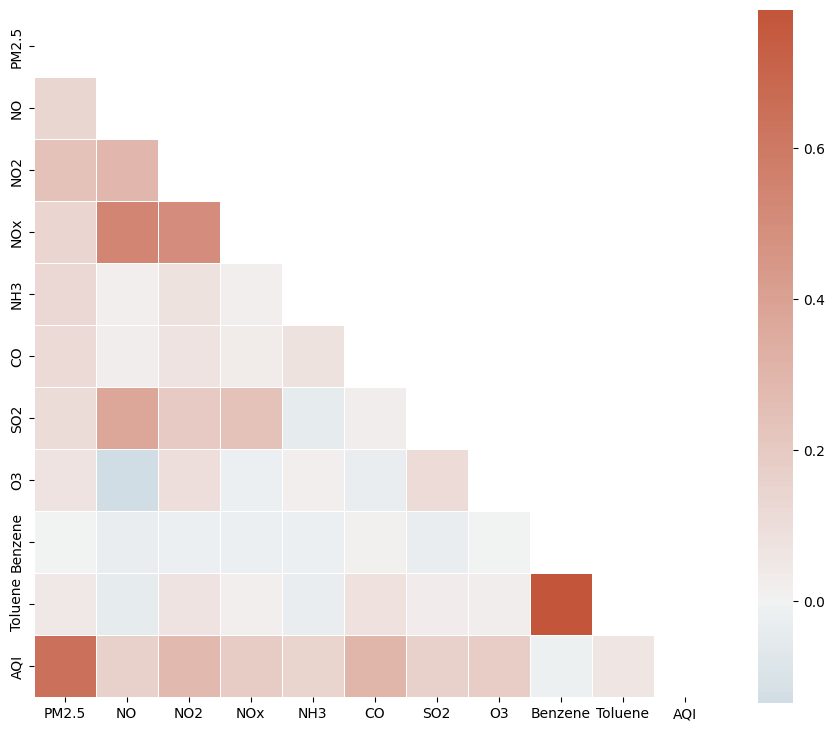

In [ ]:
# heatmap
mask = np.triu(np.ones_like(df_sinout.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_sinout.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

In [ ]:
df_sinout.corr() # vemos que AQI y PM2.5 estan correlacionadas, al igual que Benzeno y Tolueno, NO y NOx

<ipython-input-162-667dd191fc66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sinout.corr()


,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.138313,0.236905,0.141807,0.130156,0.121710,0.107853,0.071637,-0.004269,0.045692,0.639252
NO,0.138313,1.000000,0.289560,0.541140,0.013385,0.022029,0.378057,-0.134966,-0.034483,-0.043551,0.164189
NO2,0.236905,0.289560,1.000000,0.500058,0.076465,0.071997,0.195492,0.093688,-0.021620,0.072740,0.283408
NOx,0.141807,0.541140,0.500058,1.000000,0.017176,0.032786,0.245288,-0.020723,-0.017354,0.013428,0.190617
NH3,0.130156,0.013385,0.076465,0.017176,1.000000,0.079211,-0.048502,0.018055,-0.023648,-0.032275,0.150020
CO,0.121710,0.022029,0.071997,0.032786,0.079211,1.000000,0.023539,-0.033782,0.011162,0.080703,0.303890
SO2,0.107853,0.378057,0.195492,0.245288,-0.048502,0.023539,1.000000,0.114268,-0.031013,0.029398,0.165751
O3,0.071637,-0.134966,0.093688,-0.020723,0.018055,-0.033782,0.114268,1.000000,-0.004691,0.021838,0.183329
Benzene,-0.004269,-0.034483,-0.021620,-0.017354,-0.023648,0.011162,-0.031013,-0.004691,1.000000,0.783659,-0.015277
Toluene,0.045692,-0.043551,0.072740,0.013428,-0.032275,0.080703,0.029398,0.021838,0.783659,1.000000,0.063620


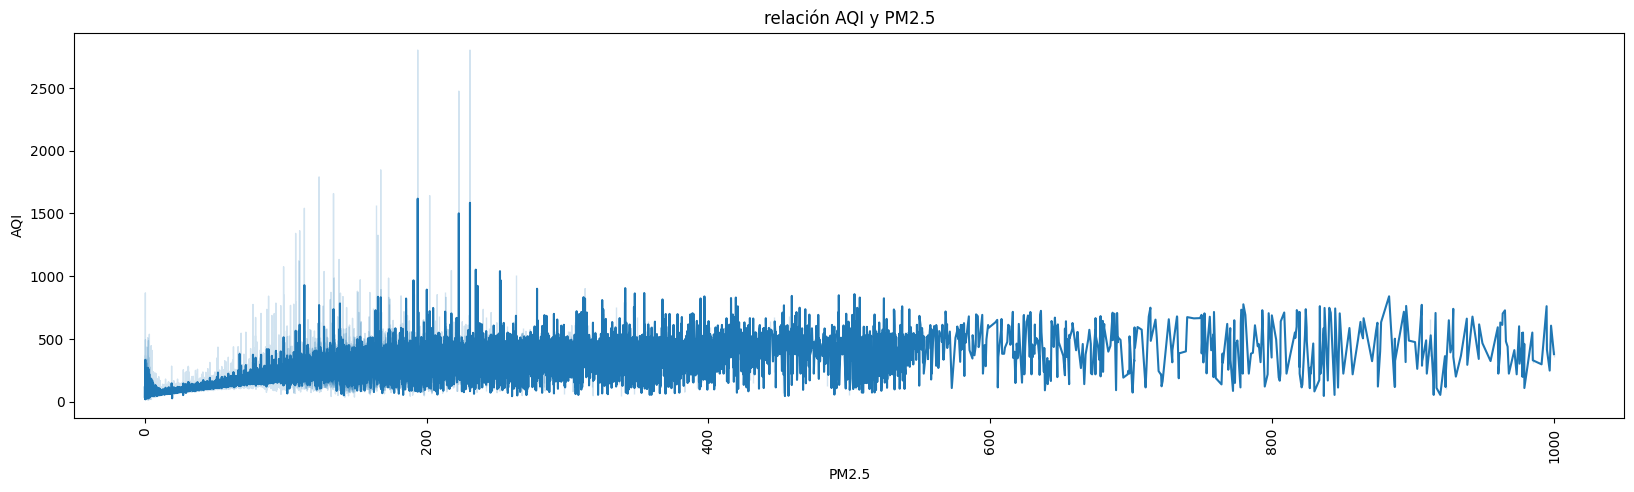

In [ ]:
# relación AQI y PM2.5 SE VE HORRIBLE POR QUE AUN TIENEN DATOS ÁTIPICOS
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x='PM2.5', y='AQI', data=df_sinout)
plt.xticks(rotation=90)
plt.title("relación AQI y PM2.5")
plt.show()

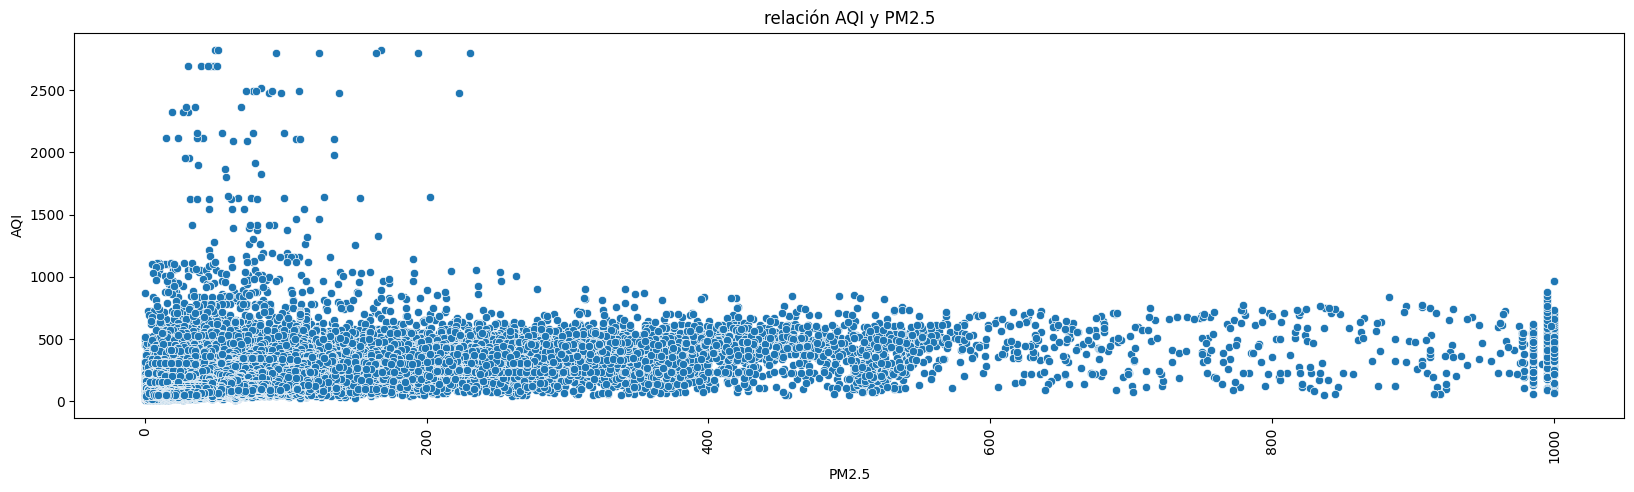

In [ ]:
# relación AQI y PM2.5
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.scatterplot(x='PM2.5', y='AQI', data=df_sinout)
plt.xticks(rotation=90)
plt.title("relación AQI y PM2.5")
plt.show()